In [1]:
from pycap import PropertyTree,EnergyStorageDevice
input_database=PropertyTree()
input_database.parse_xml('super_capacitor.xml')
# build a supercapacitor
supercapacitor_database=input_database.get_child('device')
supercapacitor=EnergyStorageDevice(supercapacitor_database)
# and its equivalent circuit
equivalent_circuit_database=EnergyStorageDevice.compute_equivalent_circuit(supercapacitor_database)
equivalent_circuit=EnergyStorageDevice(equivalent_circuit_database)

In [2]:
# setup experiment
from pycap import CyclicChargeDischarge
ptree=PropertyTree()
ptree.put_string('start_with','charge')
ptree.put_int   ('cycles',3)
ptree.put_double('time_step',0.1)
ptree.put_string('charge_mode','constant_current')
ptree.put_double('charge_current',2e-3)
ptree.put_string('charge_stop_at_1','voltage_greater_than')
ptree.put_double('charge_voltage_limit',2.1)
ptree.put_string('discharge_mode','constant_current')
ptree.put_double('discharge_current',4e-3)
ptree.put_string('discharge_stop_at_1','voltage_less_than')
ptree.put_double('discharge_voltage_limit',0.7)
ccd=CyclicChargeDischarge(ptree)

In [3]:
from pycap import initialize_data
# run cyclic charge discharge on both devices
devices={"supercapacitor":supercapacitor,"equivalent_circuit":equivalent_circuit}
results={}
for device_name in devices:
    data=initialize_data()
    ccd.run(devices[device_name],data)
    results[device_name]=data

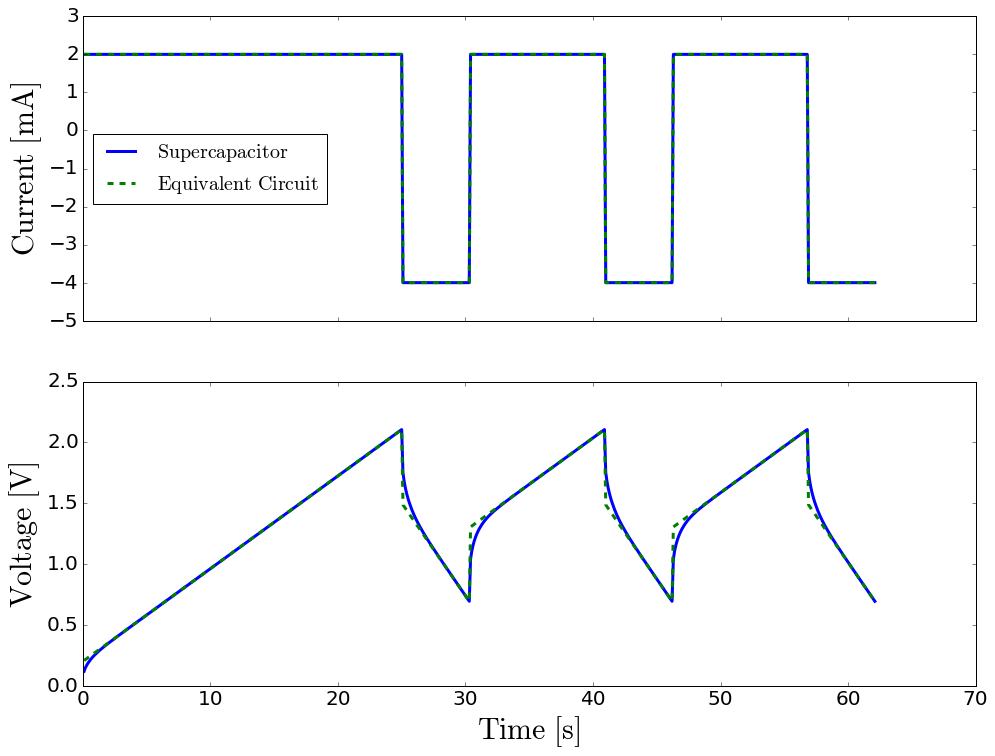

In [4]:
# visualize the results and compare
from matplotlib import pyplot
%matplotlib inline
f,axarr=pyplot.subplots(2,sharex=True,figsize=(16,12))
plot_linewidth=3
label_fontsize=30
tick_fontsize=20
labels={'supercapacitor':r'$\mathrm{Supercapacitor}$','equivalent_circuit':r'$\mathrm{Equivalent\ Circuit}$'}
line_styles={'supercapacitor':'-b','equivalent_circuit':'--g'}
for device_name in devices:
    data=results[device_name]
    axarr[0].plot(data['time'],1e3*data['current'],line_styles[device_name],lw=plot_linewidth,label=labels[device_name])
    axarr[0].set_ylabel(r'$\mathrm{Current\ [mA]}$',fontsize=label_fontsize)
    axarr[0].get_yaxis().set_tick_params(labelsize=tick_fontsize)
    axarr[0].legend(loc='center left',fontsize=20)
    axarr[1].plot(data['time'],data['voltage'],line_styles[device_name],lw=plot_linewidth,label=labels[device_name])
    axarr[1].set_ylabel(r'$\mathrm{Voltage\  [V]}$',fontsize=label_fontsize)
    axarr[1].set_xlabel(r'$\mathrm{Time\     [s]}$',fontsize=label_fontsize)
    axarr[1].get_xaxis().set_tick_params(labelsize=tick_fontsize)
    axarr[1].get_yaxis().set_tick_params(labelsize=tick_fontsize)

As can be seen from the plot voltage versus time (current is imposed), the equivalent circuit model predicts rather well the behavior of the supercapacitor here. The only discrepancies that are present appear when the operating conditions toggle from charge to discharge. After a short transient, both models are in perfect agreement.

If the charge and discharge rates are reduced (for instance divide the currents by two, i.e. set `charge_current` to $1\ \mathrm{mA}$ and `discharge_current` to $2\ \mathrm{mA}$, and re-run the experiment) the difference between the two charge-discharge curves vanishes. Conversely, higher rates will exacerbate the discrepancies.